# ODMAC++ Data Plotter

## Imports

In [154]:
import csv, os
import matplotlib.pyplot as plt

## Read data from CSV

In [155]:
FILE_NAME = "realdata_90d_40000b_odmacpp_gb_90sw"

data_labels  = []
data_indices = []
data_values  = {}

folder_prefix = "../output/"
file_path = folder_prefix + FILE_NAME + '.csv'
with open(file_path) as csv_file:
    rows = csv.reader(csv_file, delimiter=';')
    title = True
    for row in rows:

        # initialize data labels & indices
        if title:
            c = 0
            for col_label in row:
                if not(col_label in data_values):
                    data_values[col_label] = []

                data_labels.append(col_label)
                data_indices.append(len(data_values[col_label]))
                data_values[col_label].append([])
                c += 1

            title = False
            continue

        # add new data
        c = 0
        for col_value in row:
            label = data_labels[c]
            index = data_indices[c]
            data_values[label][index].append(float(col_value))
            c += 1

## Plot Simulation Data

3 Total Downtime (d) -> 1.8173611111111112
3 Total Downtime (d) -> 0.9409722222222222
3 Total Downtime (d) -> 0.7972222222222223


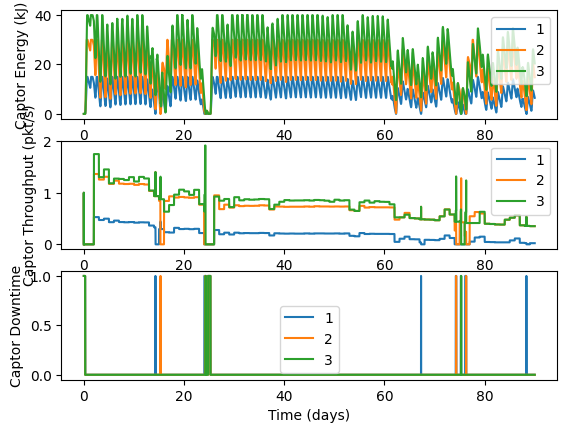

In [156]:
SHOWN             = -1 # amount of points/time steps to plot, -1 for everything
SIZE              = 1
TIME_LABEL        = 'Time (days)'
IGNORED_VARIABLES = [TIME_LABEL, 'Frequency', 'Sink', 'Energy Profile'] # Ignored data
FIG_NUMBER        = 3
USE_AXES          = True

axc = 0
if USE_AXES:
    fig, axes = plt.subplots(FIG_NUMBER)

def is_ignored(key):
    for ignored in IGNORED_VARIABLES:
        if ignored in key:
            return True
    return False

T = data_values[TIME_LABEL][0][:SHOWN]
for key, lists in data_values.items():

    # Don't print ignored variables
    if is_ignored(key):
        c += 1
        continue

    if USE_AXES:
        ax = axes[axc % FIG_NUMBER]
    else:
        plt.clf()

    c = 0
    for Y in lists:
        Y = Y[:SHOWN]
        if USE_AXES:
            ax.plot(T, Y, label=str(c + 1))
            c += 1
        else:
            plt.plot(T, Y, label=str(c + 1))
    
    if 'Downtime' in key:
        seconds_per_tick = 60
        for data in lists:
            print(c, 'Total Downtime (d) ->', sum(data) * seconds_per_tick / (60 * 60 * 24))

    if USE_AXES:
        ax.set_ylabel(key)
        ax.set_xlabel(TIME_LABEL)
        if len(lists) > 1:
            ax.legend()
        axc += 1
    else:
        plt.ylabel(key)
        plt.xlabel(TIME_LABEL)
        if len(lists) > 1:
            plt.legend()
        plt.show()

## Throughput & Downtime w.r.t. exposure/battery size

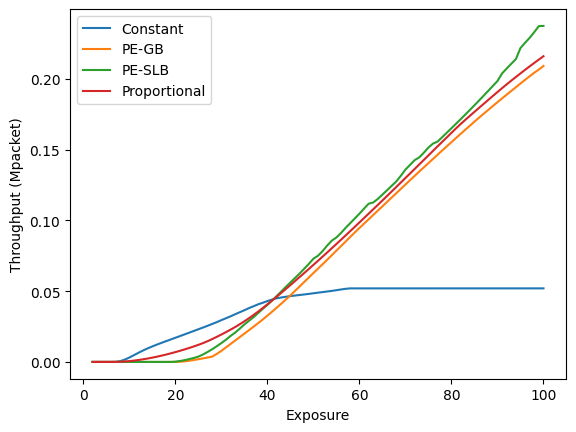

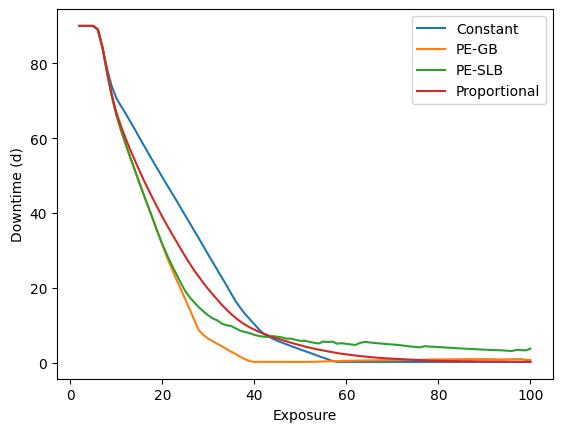

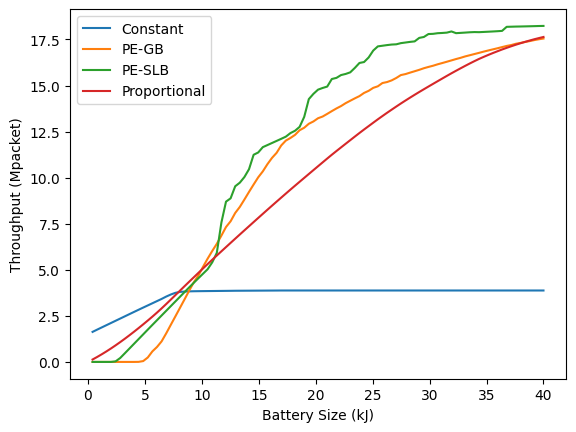

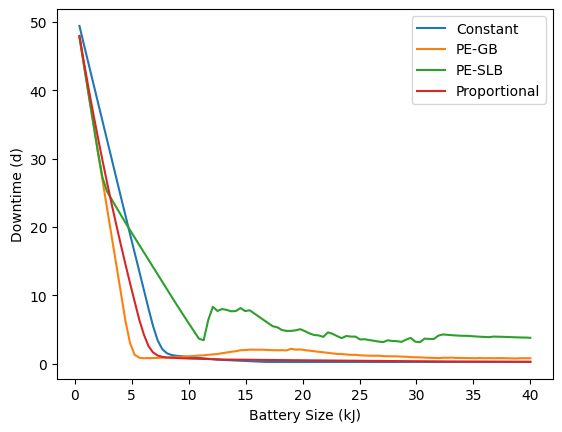

In [157]:
FILE_PREFIXES = ["wrt_exposure_", "wrt_capacity_"]
X_LABELS      = ["Exposure", "Battery Size (kJ)"]
X_UNITS       = [1, 1e3]

for I in range(len(FILE_PREFIXES)):

        exposures = []
        thrghputs = []
        downtimes = []
        labels    = []

        folder_prefix = "../output/"
        for file_name in os.listdir(folder_prefix):
                if not file_name.startswith(FILE_PREFIXES[I]):
                        continue

                exposure = []
                thrghput = []
                downtime = []

                file_path = folder_prefix + file_name
                with open(file_path) as csv_file:
                        rows = csv.reader(csv_file, delimiter=';')
                        title = True
                        for row in rows:
                                if title:
                                        title = False
                                        continue

                                exposure.append(float(row[0]) / X_UNITS[I])
                                thrghput.append(float(row[1]) / 1e6)
                                downtime.append(float(row[2]) / 3.6e3 / 24)

                exposures.append(exposure)
                thrghputs.append(thrghput)
                downtimes.append(downtime)
                labels.append(file_name[len(FILE_PREFIXES[I]):-4])

        def plot(xs, ys, xlabel, ylabel):
                for i in range(len(xs)):
                        plt.plot(xs[i], ys[i], label=labels[i])
                plt.xlabel(xlabel)
                plt.ylabel(ylabel)
                plt.legend()
                plt.show()

        x_label = X_LABELS[I]
        plot(exposures, thrghputs, X_LABELS[I], 'Throughput (Mpacket)')
        plot(exposures, downtimes, X_LABELS[I], 'Downtime (d)')